In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
import pymysql
import pandas_profiling


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns



In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv ( 'BancoUno.csv')

In [8]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30199,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30200,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30201,80000,male,high school,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [9]:
credit = df

In [10]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [11]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
credit_df_dummies = pd.get_dummies (credit, columns=['SEX', 'EDUCATION','default payment next month'])

In [14]:
credit_df_dummies

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_EDUCATION,EDUCATION_X3,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_Y,default payment next month_default,default payment next month_default payment next month,default payment next month_not default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,0,0,0,0,1,0,1,0,0
2,90000,2,34,0,0,0,0,0,0,29239,...,0,0,0,0,0,1,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,0,0,0,0,0,1,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198,220000,1,39,0,0,0,0,0,0,188948,...,0,0,0,1,0,0,0,0,0,1
30199,150000,2,43,-1,-1,-1,-1,0,0,1683,...,0,0,0,1,0,0,0,0,0,1
30200,30000,2,37,4,3,2,-1,0,0,3565,...,0,0,0,0,0,1,0,1,0,0
30201,80000,1,41,1,-1,0,0,0,-1,-1645,...,0,0,0,1,0,0,0,1,0,0


In [15]:
credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   LIMIT_BAL                                              30203 non-null  object
 1   MARRIAGE                                               30203 non-null  object
 2   AGE                                                    30203 non-null  object
 3   PAY_0                                                  30203 non-null  object
 4   PAY_2                                                  30203 non-null  object
 5   PAY_3                                                  30203 non-null  object
 6   PAY_4                                                  30203 non-null  object
 7   PAY_5                                                  30203 non-null  object
 8   PAY_6                                                  3

In [16]:
credit_df_dummies =credit_df_dummies.drop(columns=['SEX_SEX', 'SEX_X2', 'EDUCATION_EDUCATION','EDUCATION_X3'])
credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   LIMIT_BAL                                              30203 non-null  object
 1   MARRIAGE                                               30203 non-null  object
 2   AGE                                                    30203 non-null  object
 3   PAY_0                                                  30203 non-null  object
 4   PAY_2                                                  30203 non-null  object
 5   PAY_3                                                  30203 non-null  object
 6   PAY_4                                                  30203 non-null  object
 7   PAY_5                                                  30203 non-null  object
 8   PAY_6                                                  3

In [17]:
header = credit_df_dummies.dtypes.index
print(header)

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university', 'default payment next month_Y',
       'default payment next month_default',
       'default payment next month_default payment next month',
       'default payment next month_not default'],
      dtype='object')


In [18]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
credit_df_dummies.mean(axis=0)

----------------------
Media de cada variable
----------------------


SEX_female                                               0.603152
SEX_male                                                 0.396782
EDUCATION_graduate school                                0.353342
EDUCATION_high school                                    0.163957
EDUCATION_other                                          0.015561
EDUCATION_university                                     0.467073
default payment next month_Y                             0.000033
default payment next month_default                       0.221236
default payment next month_default payment next month    0.000033
default payment next month_not default                   0.778697
dtype: float64

In [19]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
credit_df_dummies.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


SEX_female                                               0.239368
SEX_male                                                 0.239354
EDUCATION_graduate school                                0.228499
EDUCATION_high school                                    0.137080
EDUCATION_other                                          0.015320
EDUCATION_university                                     0.248924
default payment next month_Y                             0.000033
default payment next month_default                       0.172297
default payment next month_default payment next month    0.000033
default payment next month_not default                   0.172333
dtype: float64

In [20]:
corrMat = credit_df_dummies.corr()
print(corrMat)

                                                    SEX_female  SEX_male  \
SEX_female                                            1.000000 -0.999862   
SEX_male                                             -0.999862  1.000000   
EDUCATION_graduate school                            -0.023479  0.023579   
EDUCATION_high school                                -0.007277  0.007337   
EDUCATION_other                                       0.008485 -0.008468   
EDUCATION_university                                  0.025953 -0.025827   
default payment next month_Y                         -0.007094 -0.004667   
default payment next month_default                   -0.039824  0.039898   
default payment next month_default payment next...   -0.007094 -0.004667   
default payment next month_not default                0.040017 -0.039764   

                                                    EDUCATION_graduate school  \
SEX_female                                                          -0.023479   
S

In [21]:
covMat = credit_df_dummies.cov()
print(covMat)

                                                    SEX_female  SEX_male  \
SEX_female                                            0.239368 -0.239328   
SEX_male                                             -0.239328  0.239354   
EDUCATION_graduate school                            -0.005491  0.005514   
EDUCATION_high school                                -0.001318  0.001329   
EDUCATION_other                                       0.000514 -0.000513   
EDUCATION_university                                  0.006335 -0.006304   
default payment next month_Y                         -0.000020 -0.000013   
default payment next month_default                   -0.008088  0.008102   
default payment next month_default payment next...   -0.000020 -0.000013   
default payment next month_not default                0.008128 -0.008076   

                                                    EDUCATION_graduate school  \
SEX_female                                                          -0.005491   
S

default payment next month_not default                                            0.172333  


In [22]:
import seaborn as sns
sns.histplot (data= credit_df_dummies, x='LIMIT_BAL')

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

In [23]:
credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   LIMIT_BAL                                              30203 non-null  object
 1   MARRIAGE                                               30203 non-null  object
 2   AGE                                                    30203 non-null  object
 3   PAY_0                                                  30203 non-null  object
 4   PAY_2                                                  30203 non-null  object
 5   PAY_3                                                  30203 non-null  object
 6   PAY_4                                                  30203 non-null  object
 7   PAY_5                                                  30203 non-null  object
 8   PAY_6                                                  3

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

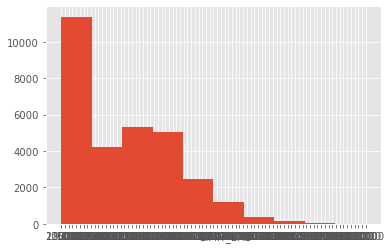

In [25]:
plt.hist(credit_df_dummies['LIMIT_BAL'])
plt.show()

In [26]:
import statsmodels.api as sm


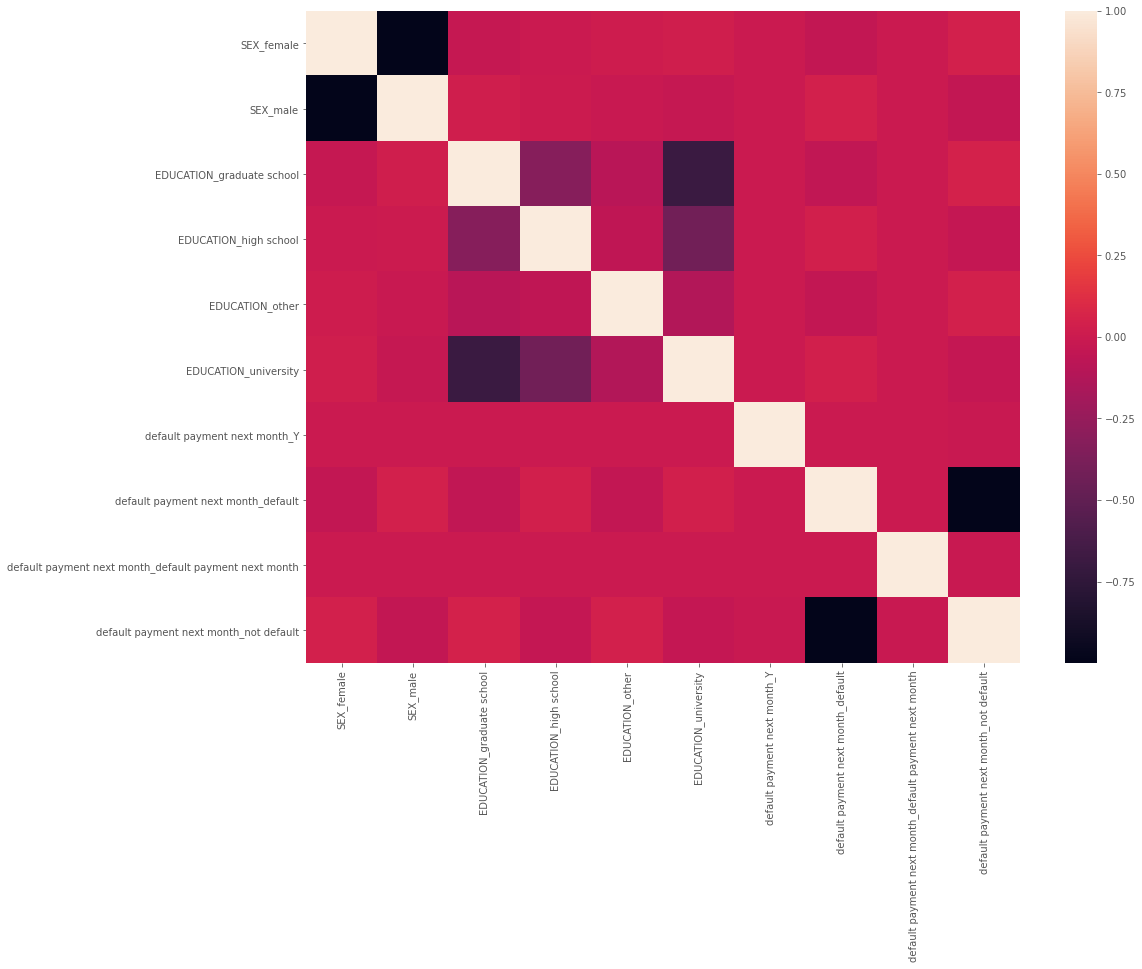

In [27]:
matrix = credit_df_dummies.corr()

plt.figure(figsize=(16,12))

_ = sns.heatmap(matrix)

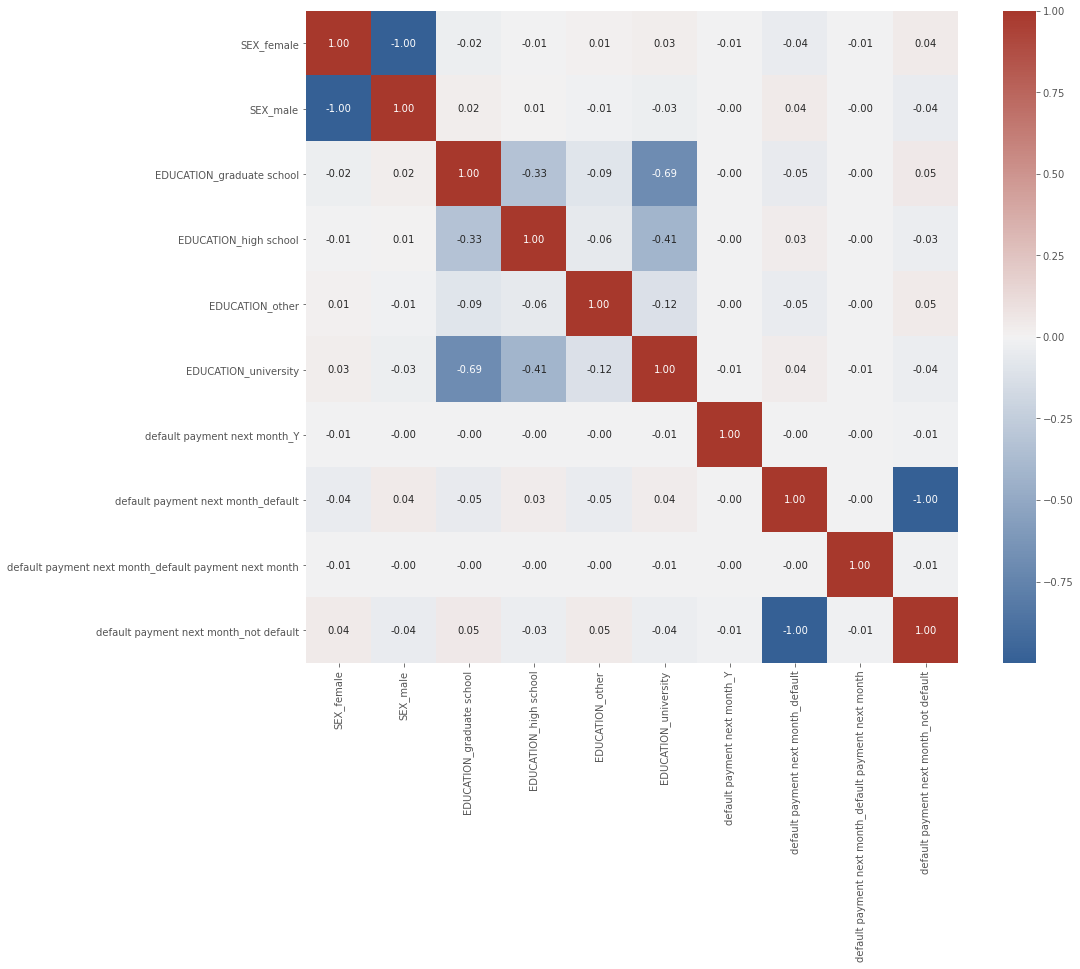

In [28]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

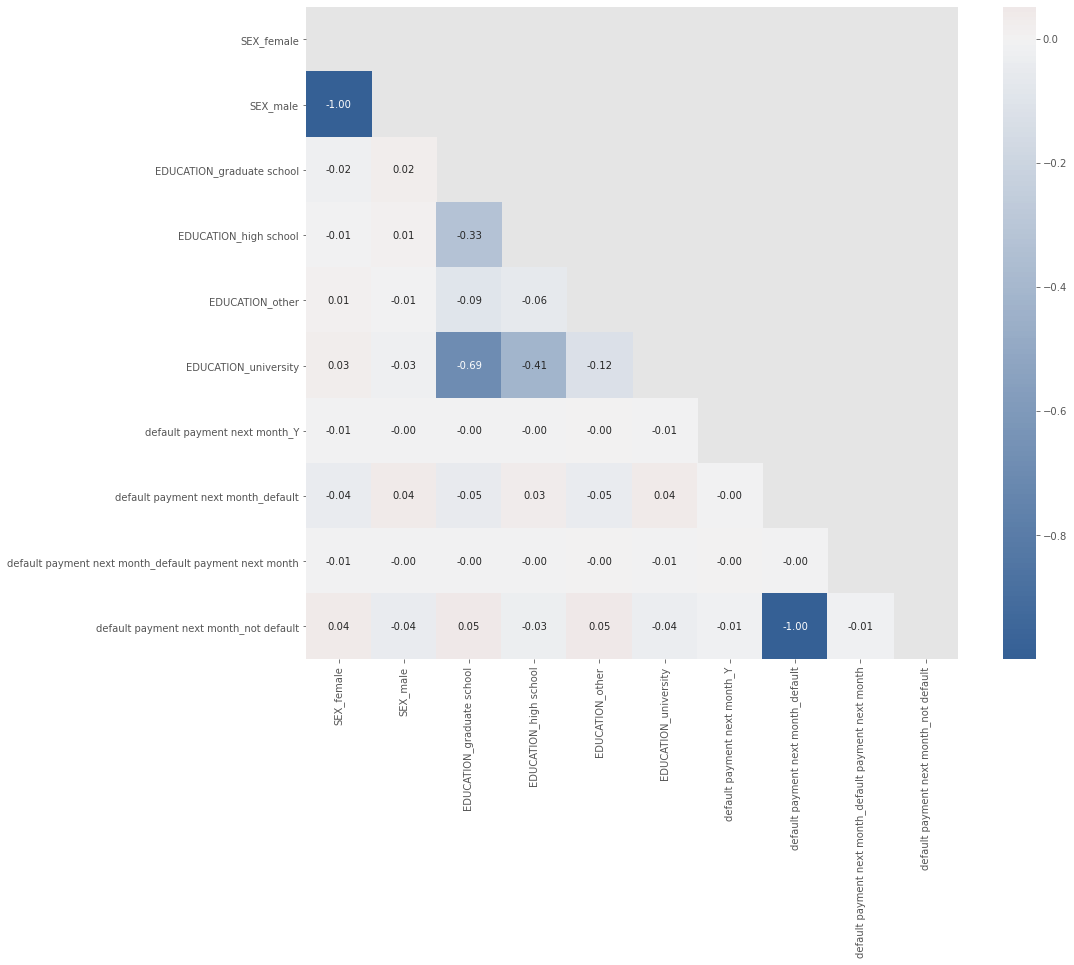

In [29]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [36]:
y = df ['LIMIT_BAL']

In [37]:
print (y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
30198    220000
30199    150000
30200     30000
30201     80000
30202     50000
Name: LIMIT_BAL, Length: 30203, dtype: object


In [7]:
X = rawData.iloc[you can choose what goes here]
print('Summary of feature sample')
X.head()

NameError: name 'pd' is not defined